In [ ]:
import io
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp 
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import confusion_matrix



In [18]:
uploaded = files.upload()

Saving heart.csv to heart.csv


In [19]:
data = pd.read_csv("heart.csv", sep=",")

In [ ]:
data.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
null_counts = data.isnull().sum()
print(null_counts)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


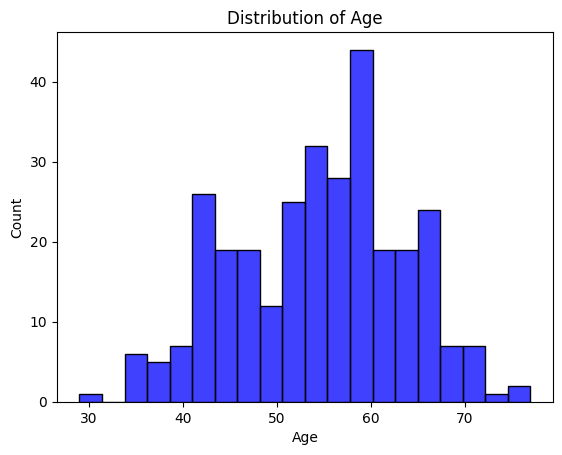

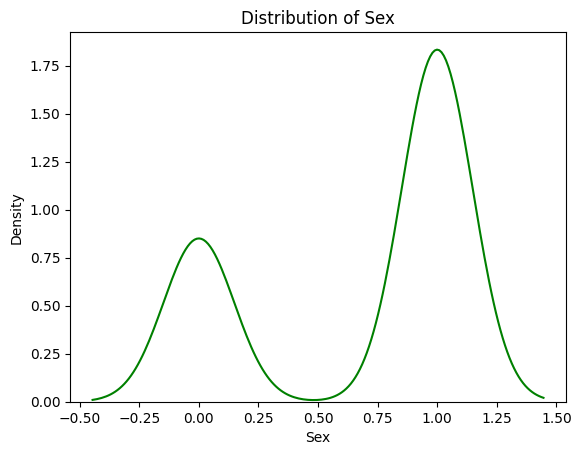

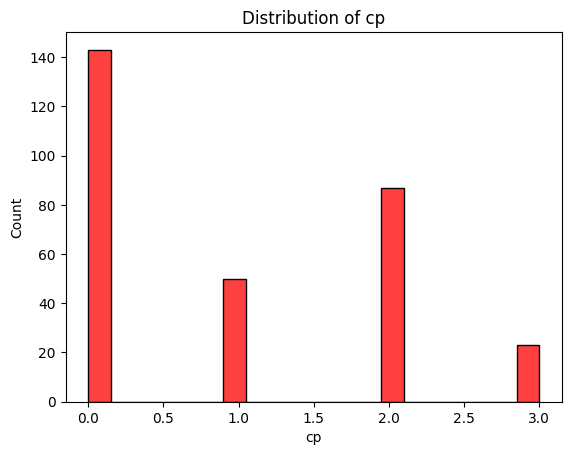

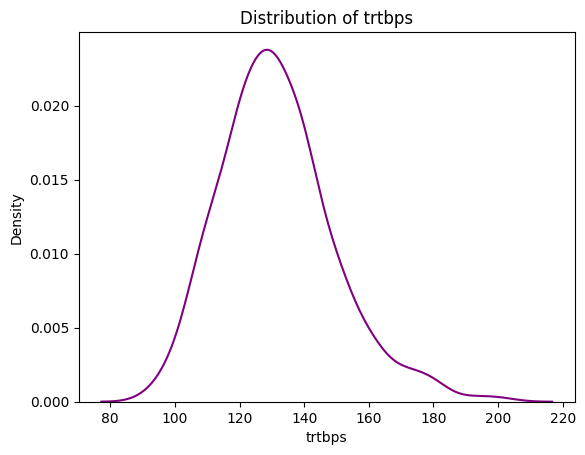

In [ ]:
sns.histplot(data=data, x='age', bins=20, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

sns.kdeplot(data=data, x='sex', color='green')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Density')
plt.show()

sns.histplot(data=data, x='cp', bins=20, color='red')
plt.title('Distribution of cp')
plt.xlabel('cp')
plt.ylabel('Count')
plt.show()

sns.kdeplot(data=data, x='trtbps', color='purple')
plt.title('Distribution of trtbps')
plt.xlabel('trtbps')
plt.ylabel('Density')
plt.show()

age        -0.225439
sex        -0.280937
cp          0.433798
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalachh    0.421741
exng       -0.436757
oldpeak    -0.430696
slp         0.345877
caa        -0.391724
thall      -0.344029
output      1.000000
Name: output, dtype: float64


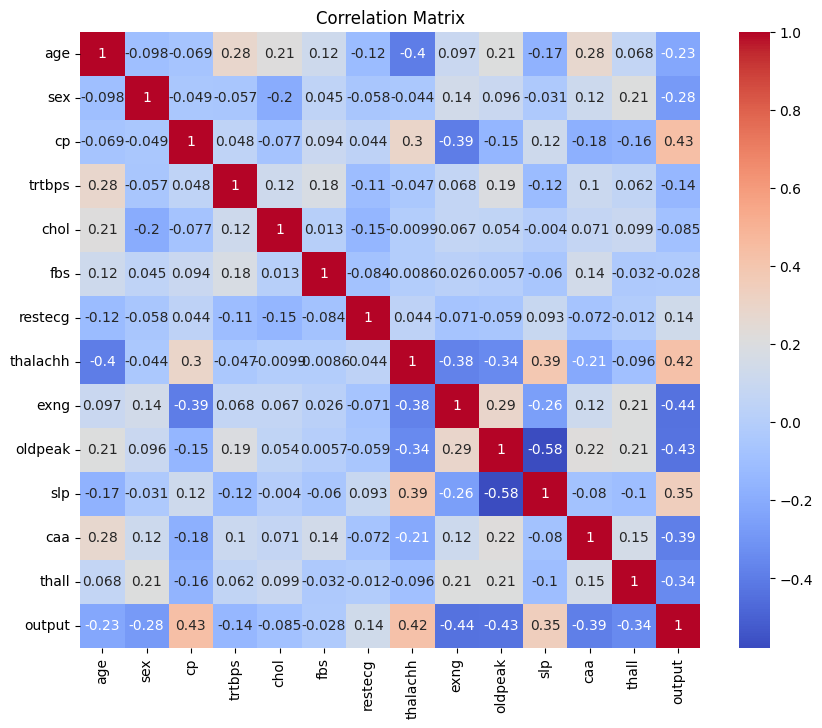

In [ ]:
# Create a correlation matrix between all features and the target variable
correlation_matrix = data.corr()['output']

plt.figure(figsize=(10, 8))

# Print the correlation coefficients for each feature
print(correlation_matrix)

# Create a heatmap to visualize the correlation matrix
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

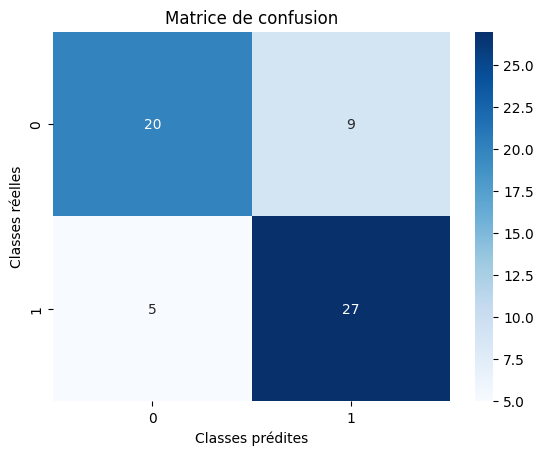

In [20]:
X = data.drop(columns=['output'])
y = data['output']

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle de classification
svm_classifier = SVC(kernel='poly', C=1)

# Entraîner le modèle sur les données d'apprentissage
svm_classifier.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = svm_classifier.predict(X_test)

# Créer une matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion sous forme d'une heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Classes prédites')
plt.ylabel('Classes réelles')
plt.show()

In [21]:

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the SVM model with different values of C and kernel
for c in [0.1, 1, 10]:
    for kernel in ['linear', 'poly', 'rbf']:
        # create the SVM model
        svm_model = SVC(kernel=kernel, C=c)

        # fit the model on the training data
        svm_model.fit(X_train, y_train)

        # make predictions on the test data
        y_pred = svm_model.predict(X_test)

        # compute the accuracy of the model
        accuracy = accuracy_score(y_test, y_pred)

        # print the accuracy and the hyperparameters used
        print(f"Accuracy with C={c} and kernel={kernel}: {accuracy}")


Accuracy with C=0.1 and kernel=linear: 0.8852459016393442
Accuracy with C=0.1 and kernel=poly: 0.5245901639344263
Accuracy with C=0.1 and kernel=rbf: 0.5245901639344263
Accuracy with C=1 and kernel=linear: 0.8688524590163934
Accuracy with C=1 and kernel=poly: 0.7704918032786885
Accuracy with C=1 and kernel=rbf: 0.7049180327868853
Accuracy with C=10 and kernel=linear: 0.8852459016393442
Accuracy with C=10 and kernel=poly: 0.819672131147541
Accuracy with C=10 and kernel=rbf: 0.7704918032786885


Best Hyperparameters:  {'C': 1, 'kernel': 'linear'}
Training Score:  0.8138605442176872
Test Score:  0.8688524590163934


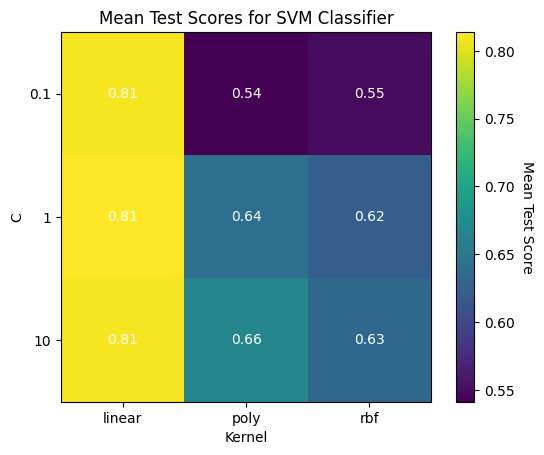

In [22]:
# load the heart disease dataset
heart_disease = pd.read_csv('heart.csv')

# split the data into features (X) and target (y)
X = heart_disease.drop('output', axis=1)
y = heart_disease['output']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the hyperparameters to search
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf']}

# create the SVM model
svm_model = SVC()

# create the grid search object
grid_search = GridSearchCV(svm_model, param_grid, cv=5)

# fit the grid search object on the training data
grid_search.fit(X_train, y_train)

# print the best hyperparameters found by the grid search

print("Best Hyperparameters: ", grid_search.best_params_)
print("Training Score: ", grid_search.best_score_)
print("Test Score: ", grid_search.score(X_test, y_test))

# make predictions on the test data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


# extract the mean test scores for each combination of hyperparameters
mean_test_scores = grid_search.cv_results_['mean_test_score']

# reshape the mean test scores to a 2D array
mean_test_scores = np.reshape(mean_test_scores, (3, 3))

# create a plot of the mean test scores
fig, ax = plt.subplots()
im = ax.imshow(mean_test_scores, cmap='viridis')

# set the axis labels and ticks
ax.set_xticks(np.arange(len(param_grid['kernel'])))
ax.set_yticks(np.arange(len(param_grid['C'])))
ax.set_xticklabels(param_grid['kernel'])
ax.set_yticklabels(param_grid['C'])
ax.set_xlabel('Kernel')
ax.set_ylabel('C')

# add the colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Mean Test Score', rotation=-90, va='bottom')

# add the values of the mean test scores to the plot
for i in range(len(param_grid['C'])):
    for j in range(len(param_grid['kernel'])):
        text = ax.text(j, i, f'{mean_test_scores[i, j]:.2f}',
                       ha='center', va='center', color='w')

# set the title of the plot
ax.set_title('Mean Test Scores for SVM Classifier')

# show the plot
plt.show()

In [ ]:
# define the parameter distributions to sample from
param_distributions = {'C': randint (1,10), 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# create an SVM classifier
svc = SVC()

# create a RandomizedSearchCV object with 10-fold cross validation
random_search = RandomizedSearchCV(svc, param_distributions, n_iter=10, cv=10, random_state=42)

# fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# print the best hyperparameters found by RandomizedSearchCV
print("Best Hyperparameters: ", random_search.best_params_)
print("Training Score: ", random_search.best_score_)
print("Test Score: ", random_search.score(X_test, y_test))




Best Hyperparameters:  {'C': 8, 'kernel': 'linear'}
Training Score:  0.8143333333333335
Test Score:  0.8852459016393442


<function matplotlib.pyplot.show(close=None, block=None)>

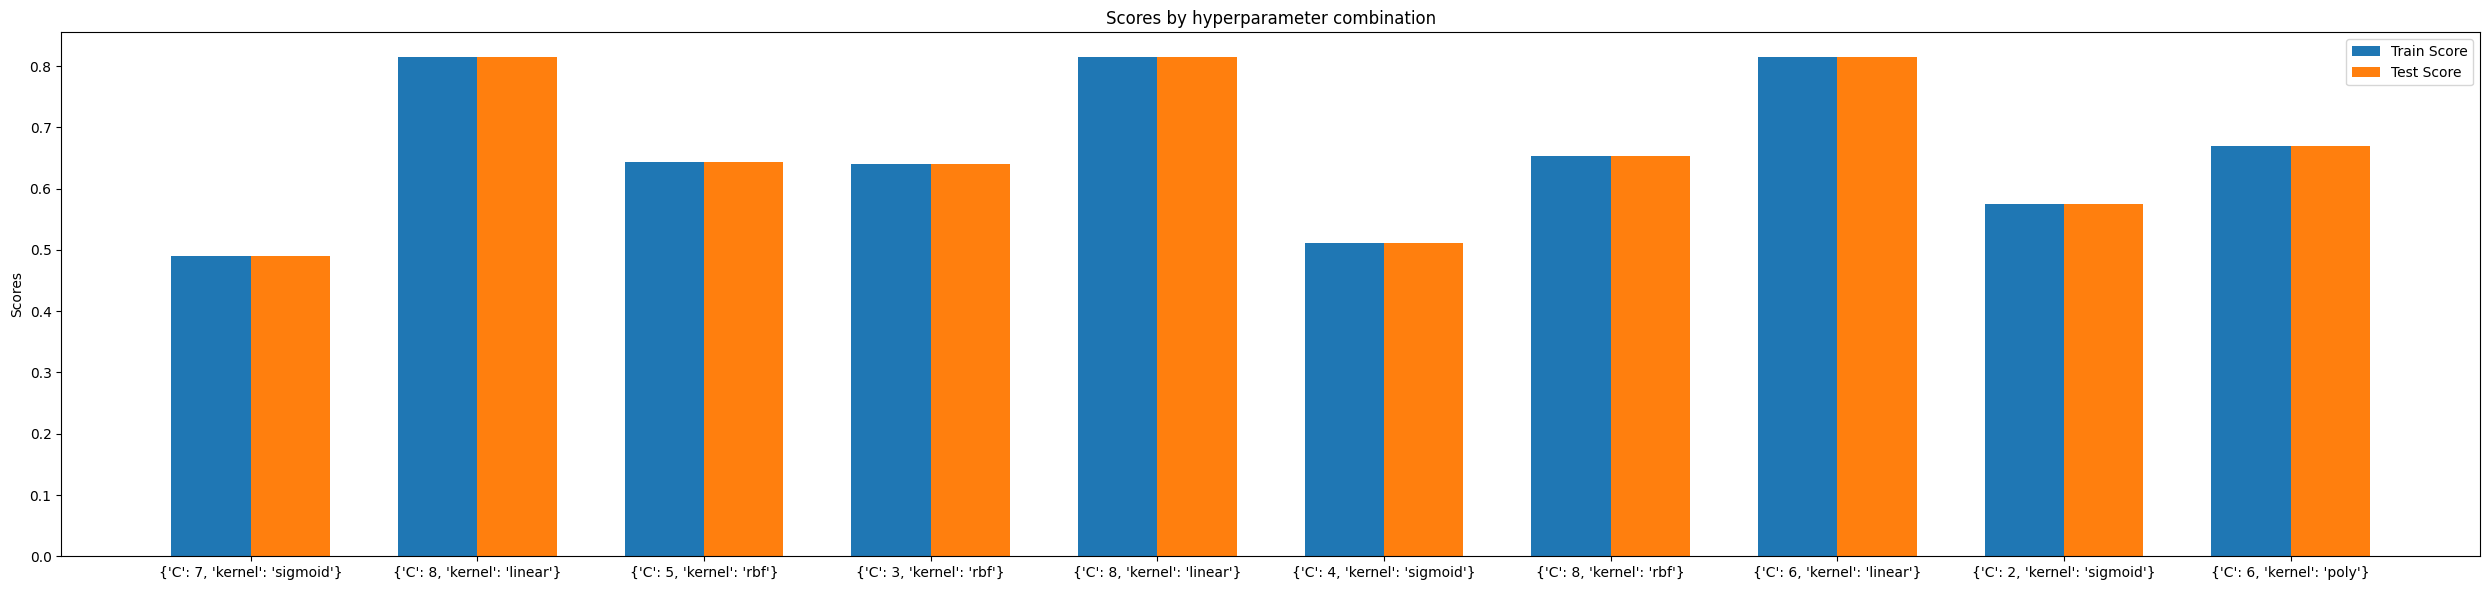

In [ ]:
# Store the results in arrays
params = []
train_scores = []
test_scores = []
for i, hyperparams in enumerate(random_search.cv_results_['params']):
  params.append(str(hyperparams))
  train_scores.append(random_search.cv_results_['mean_test_score'][i])
  test_scores.append(random_search.cv_results_['mean_test_score'][i])

# Set up the bar chart
x = np.arange(len(params))
width = 0.35

fig, ax = plt.subplots(figsize=(25, 6))
rects1 = ax.bar(x - width/2, train_scores, width, label='Train Score')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by hyperparameter combination')
ax.set_xticks(x)
ax.set_xticklabels(params)
ax.legend()

fig.tight_layout()

plt.show